In [5]:
# made by Gibeom LEE, HI LAB
# 한 폴더 내 모든 csv 파일의 TENG Vpp값을 구할 때 유용합니다.
# +250806 각 frequency도 같이 보여줍니다.

In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [7]:
# 폴더 경로
folder_path = r"C:\Users\user\Desktop\Drive파일\HI Lab\0. Projects\0. On going\2. Aloe inspired DEG\0. 실험자료\4. Data measurement\250829_Squalane 등장\minimized_csv파일"

# 사용자 설정값
prominence_ratio = 0.3 # 신호의 표준편차(std)에 곱해 피크 prominence 기준을 설정 / 주변 값보다 얼마나 돌출된 정도여야 피크로 인식할지를 결정
min_prominence = 0.1 # prominence의 최솟값 제한 / std가 너무 작아서 prominence가 너무 낮게 계산되는 경우를 방지
min_distance_sec = 0.15 #인접한 피크 간 최소 시간 간격 (초 단위)
snr_threshold = 1 # Signal-to-Noise Ratio 기준값 / 값이 높을수록 강한 피크만 통과
min_relative_height = 0.01 # 전체 최대 진폭설정 ex) 0.2: 20% 이상 

#그래프
y_range = (-30, 10)

hex_020_Vpp: 4.56 V
hex_020_Peak number: 26개
hex_020_표준편차: 1.86
hex_020_주파수: 3.70 Hz


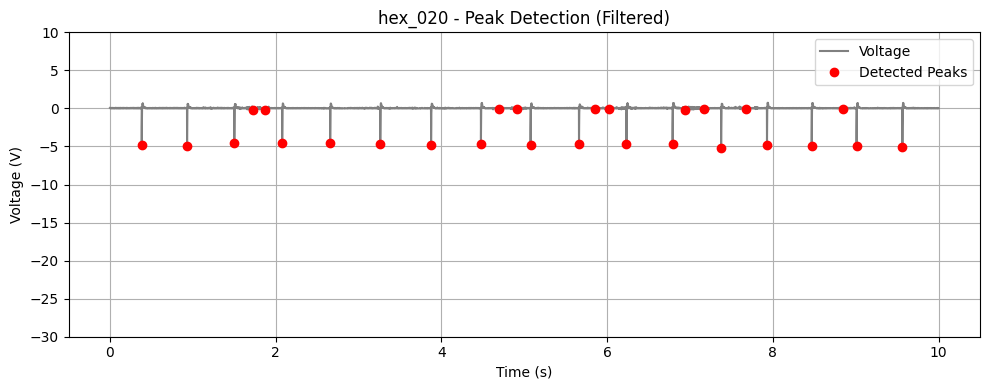

hex_030_Vpp: 5.32 V
hex_030_Peak number: 17개
hex_030_표준편차: 0.24
hex_030_주파수: 1.79 Hz


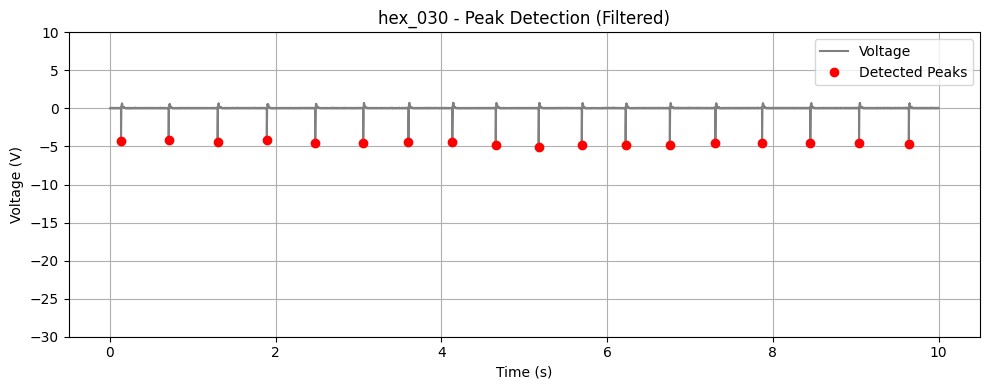

hex_040_Vpp: 5.41 V
hex_040_Peak number: 17개
hex_040_표준편차: 0.12
hex_040_주파수: 1.76 Hz


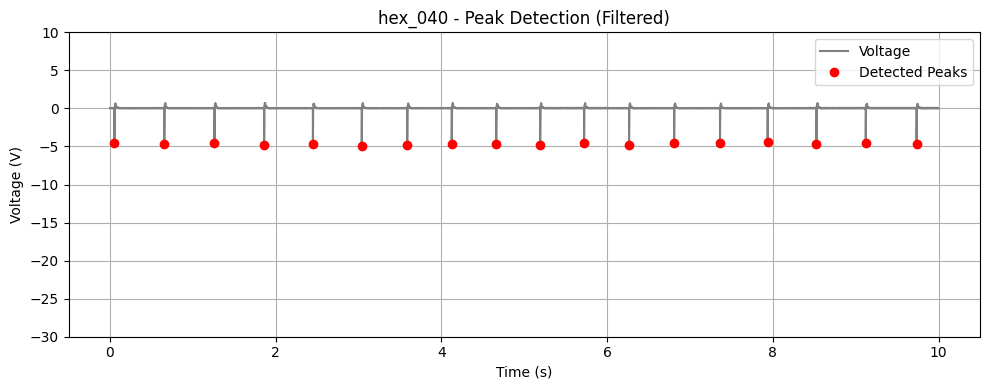

hex_050_Vpp: 5.37 V
hex_050_Peak number: 16개
hex_050_표준편차: 0.16
hex_050_주파수: 1.75 Hz


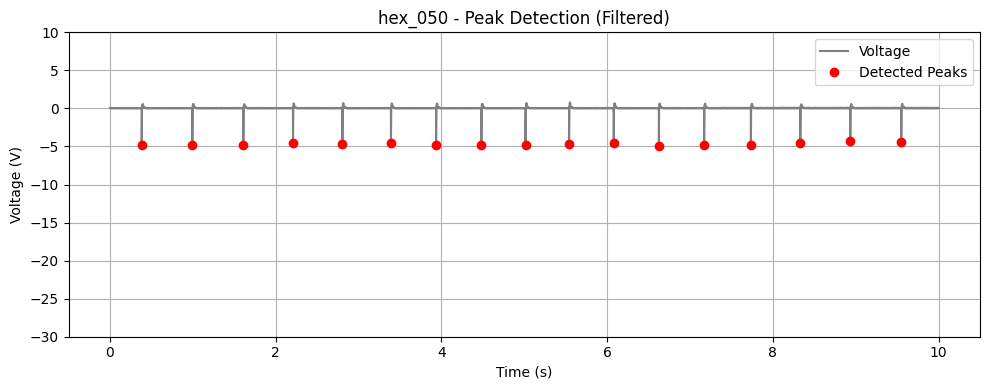

hex_100_Vpp: 6.32 V
hex_100_Peak number: 20개
hex_100_표준편차: 0.27
hex_100_주파수: 2.55 Hz


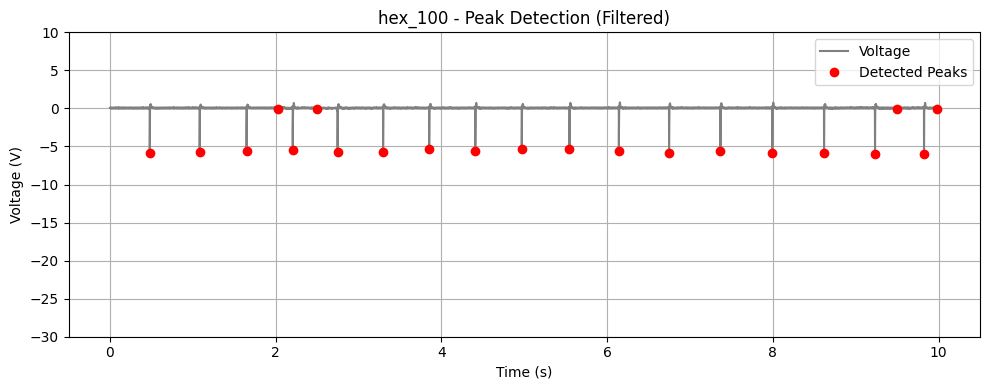

hex_150_Vpp: 5.96 V
hex_150_Peak number: 17개
hex_150_표준편차: 0.24
hex_150_주파수: 1.99 Hz


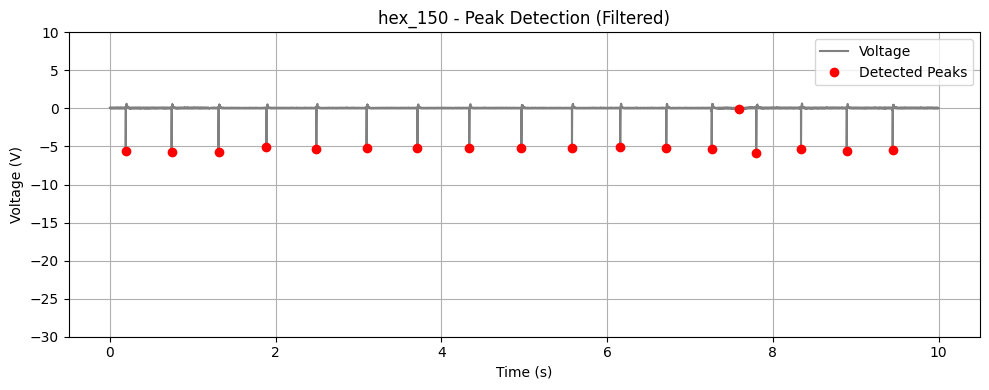

pao_000_Vpp: 0.21 V
pao_000_Peak number: 50개
pao_000_표준편차: 0.05
pao_000_주파수: 5.43 Hz


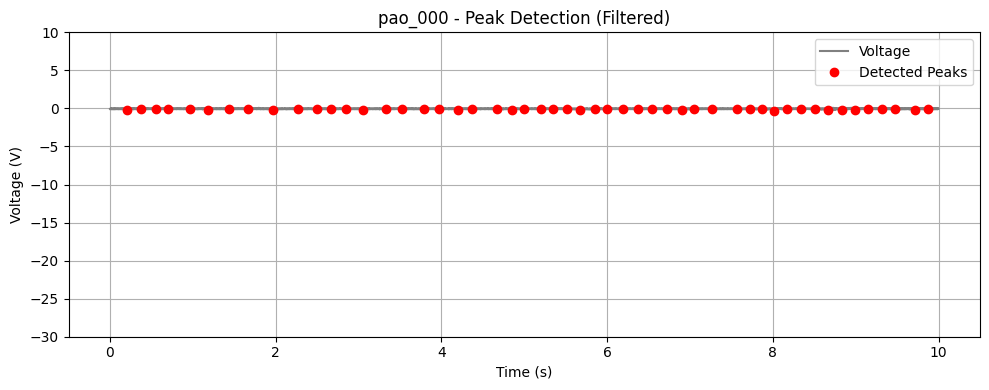

pao_010_Vpp: 0.49 V
pao_010_Peak number: 8개
pao_010_표준편차: 0.24
pao_010_주파수: 2.96 Hz


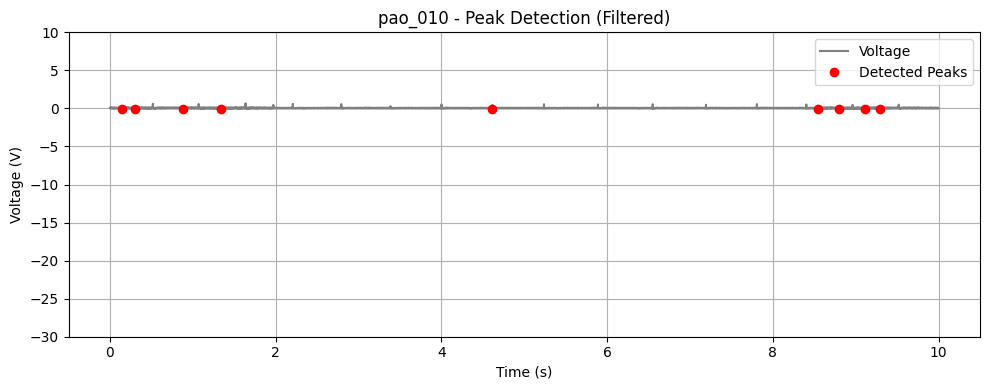

pao_020_Vpp: 0.67 V
pao_020_Peak number: 3개
pao_020_표준편차: 0.03
pao_020_주파수: 0.85 Hz


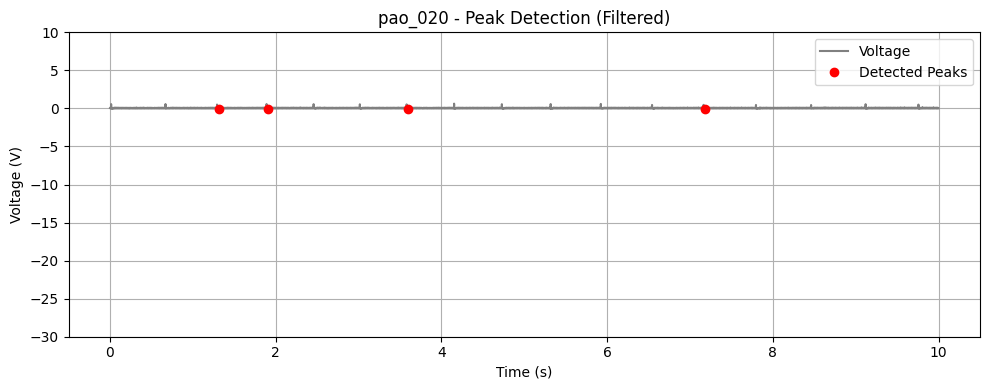

pao_050_Vpp: 0.37 V
pao_050_Peak number: 16개
pao_050_표준편차: 0.06
pao_050_주파수: 1.67 Hz


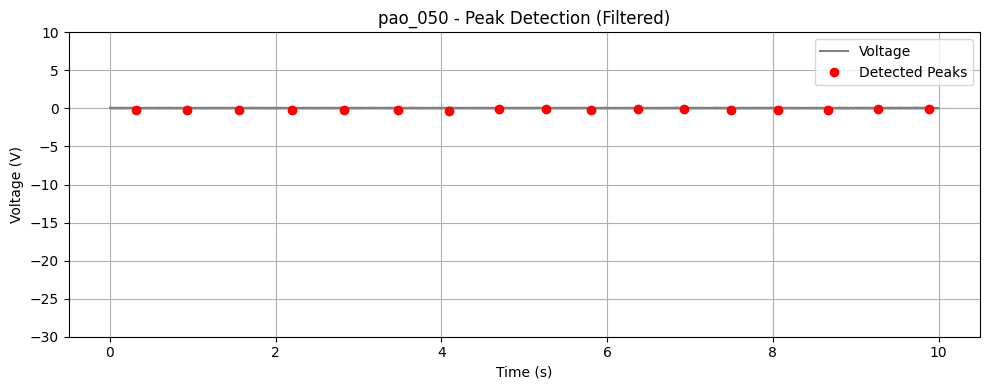

pao_100_Vpp: 1.17 V
pao_100_Peak number: 19개
pao_100_표준편차: 0.24
pao_100_주파수: 2.50 Hz


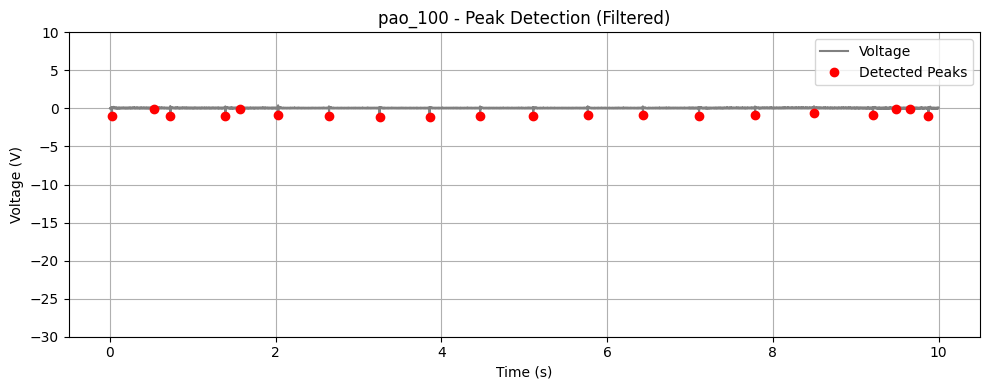

pao_150_Vpp: 1.08 V
pao_150_Peak number: 23개
pao_150_표준편차: 0.32
pao_150_주파수: 3.29 Hz


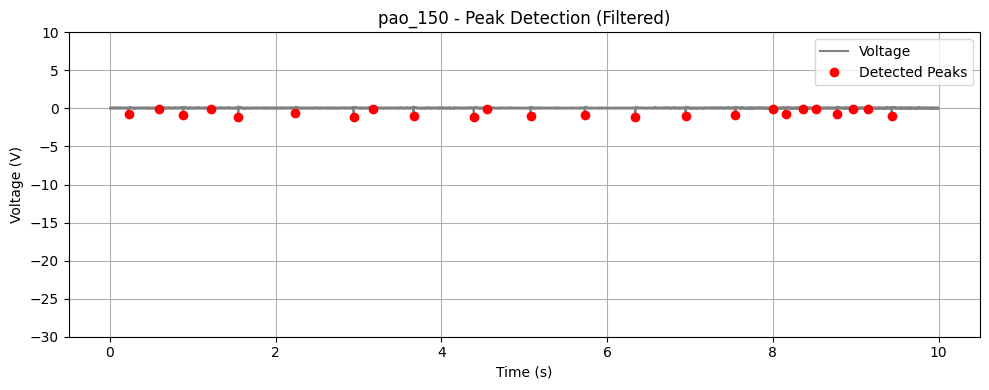

ref_hex1_A_Vpp: 14.80 V
ref_hex1_A_Peak number: 17개
ref_hex1_A_표준편차: 3.16
ref_hex1_A_주파수: 1.97 Hz


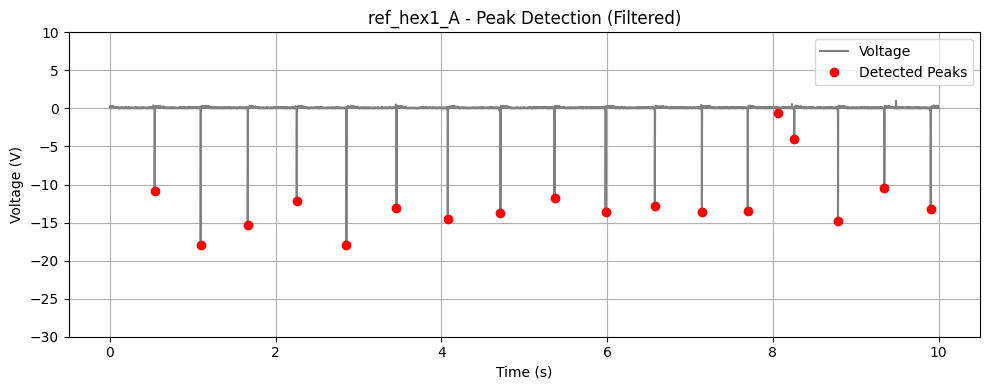

ref_hex2_A_Vpp: 21.41 V
ref_hex2_A_Peak number: 16개
ref_hex2_A_표준편차: 3.13
ref_hex2_A_주파수: 1.70 Hz


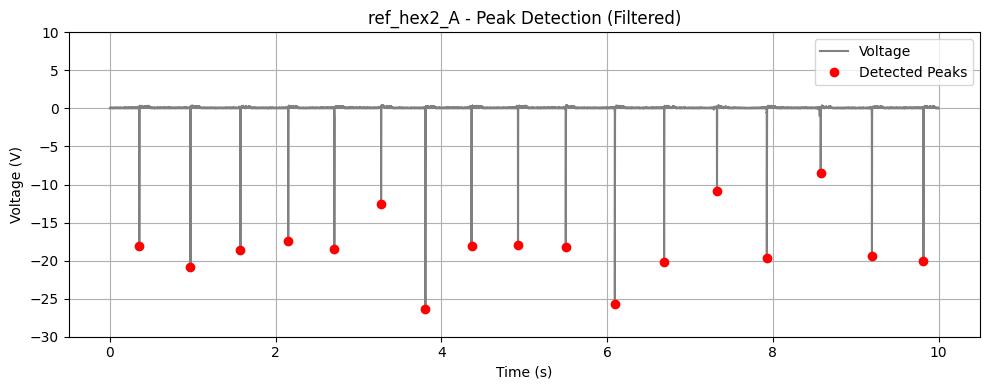

ref_hex3_A_Vpp: 19.81 V
ref_hex3_A_Peak number: 16개
ref_hex3_A_표준편차: 2.63
ref_hex3_A_주파수: 1.71 Hz


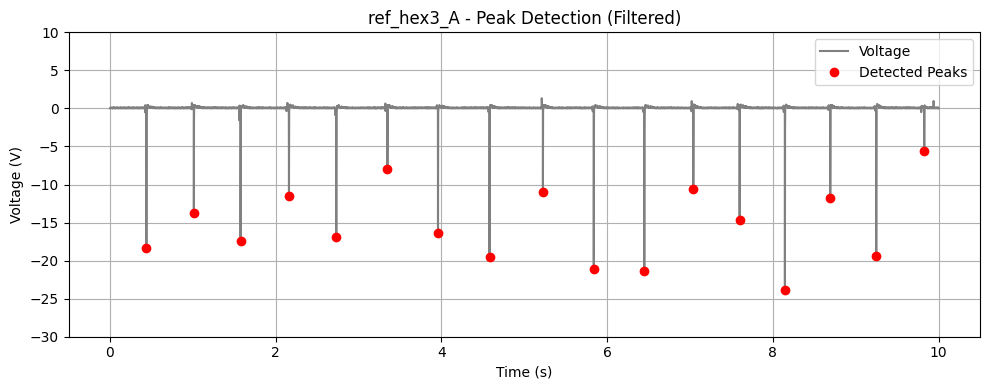

ref_ots1_A_Vpp: 9.75 V
ref_ots1_A_Peak number: 16개
ref_ots1_A_표준편차: 1.21
ref_ots1_A_주파수: 1.70 Hz


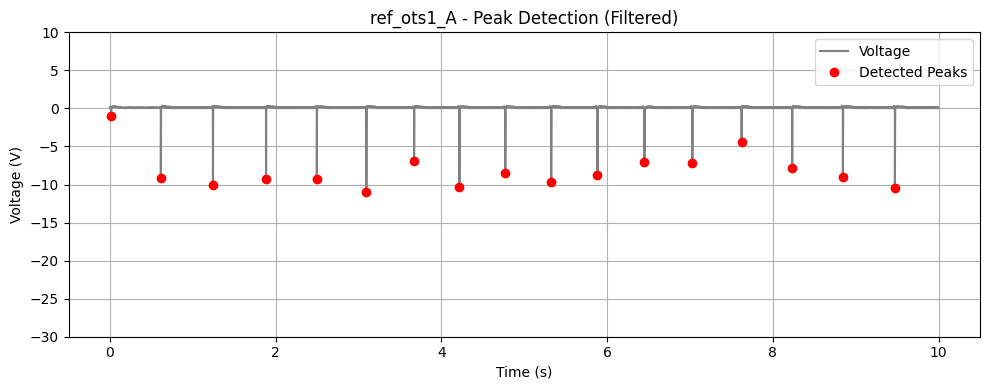

ref_ots2_A_Vpp: 14.70 V
ref_ots2_A_Peak number: 16개
ref_ots2_A_표준편차: 2.69
ref_ots2_A_주파수: 1.68 Hz


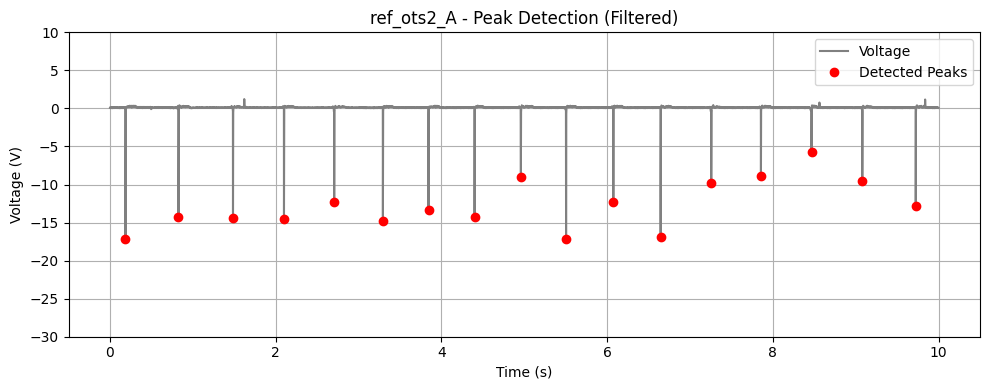

ref_pdms_A_Vpp: 4.55 V
ref_pdms_A_Peak number: 16개
ref_pdms_A_표준편차: 0.46
ref_pdms_A_주파수: 1.66 Hz


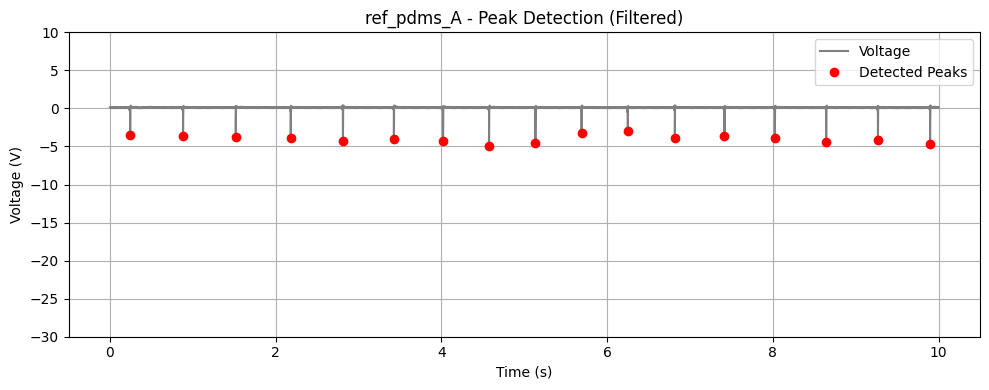

sqa_000_Vpp: 3.15 V
sqa_000_Peak number: 28개
sqa_000_표준편차: 0.84
sqa_000_주파수: 3.67 Hz


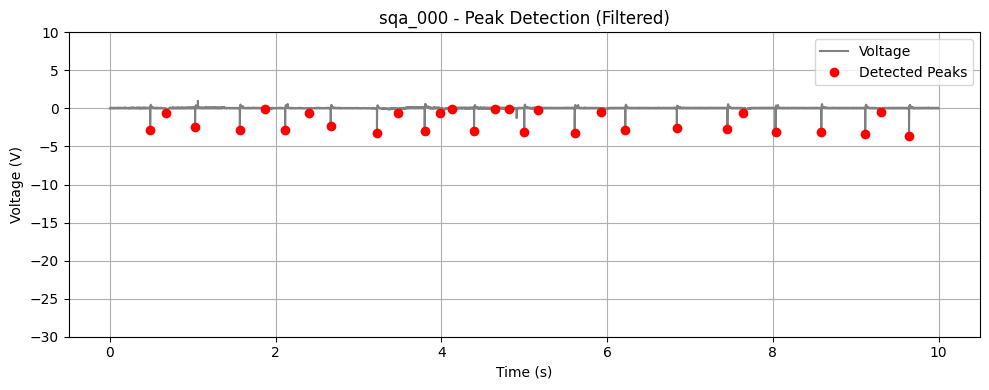

sqa_010_Vpp: 6.10 V
sqa_010_Peak number: 34개
sqa_010_표준편차: 0.30
sqa_010_주파수: 3.71 Hz


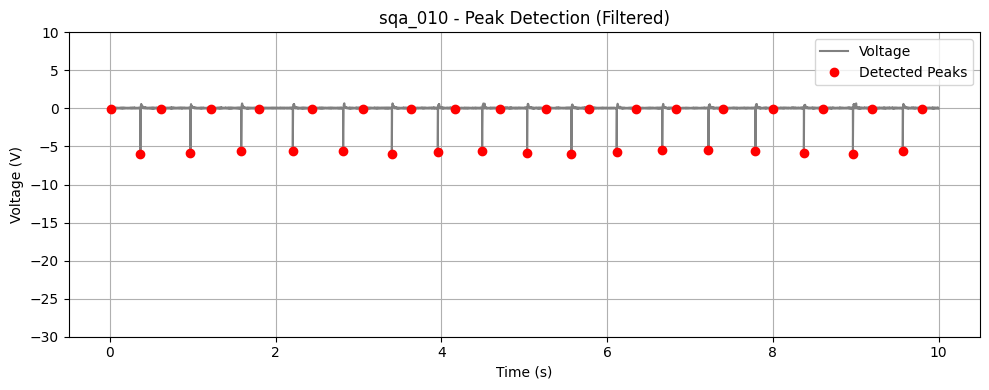

sqa_020_Vpp: 8.72 V
sqa_020_Peak number: 16개
sqa_020_표준편차: 0.23
sqa_020_주파수: 1.74 Hz


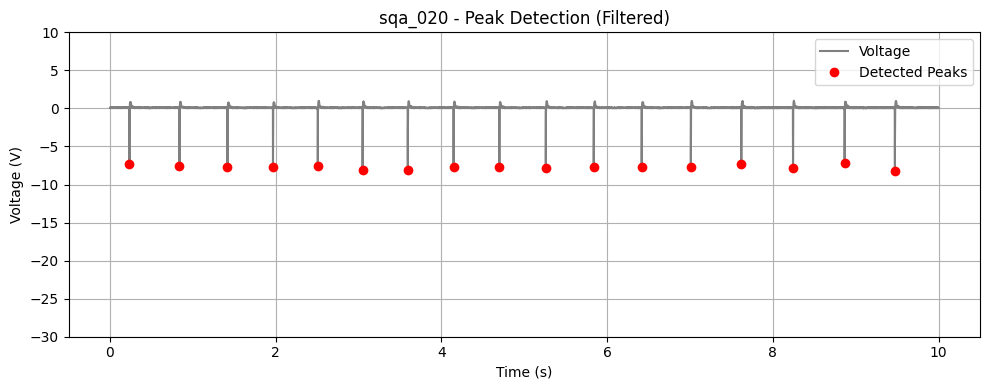

sqa_030_Vpp: 8.97 V
sqa_030_Peak number: 22개
sqa_030_표준편차: 0.47
sqa_030_주파수: 2.72 Hz


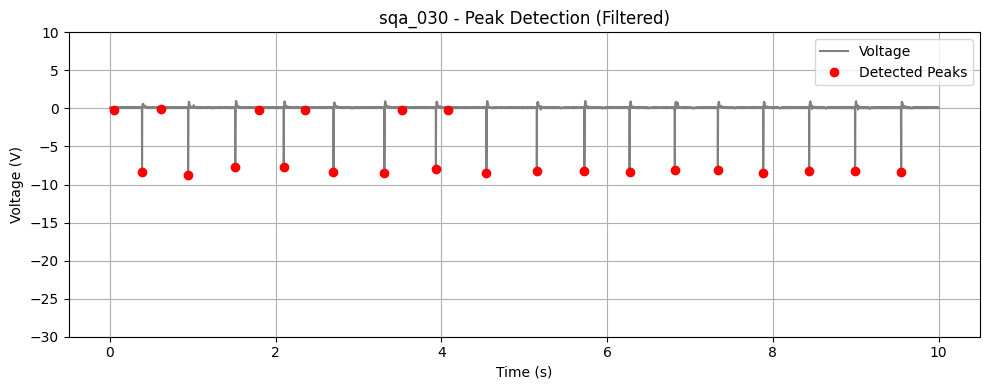

sqa_040_Vpp: 9.67 V
sqa_040_Peak number: 17개
sqa_040_표준편차: 0.30
sqa_040_주파수: 1.99 Hz


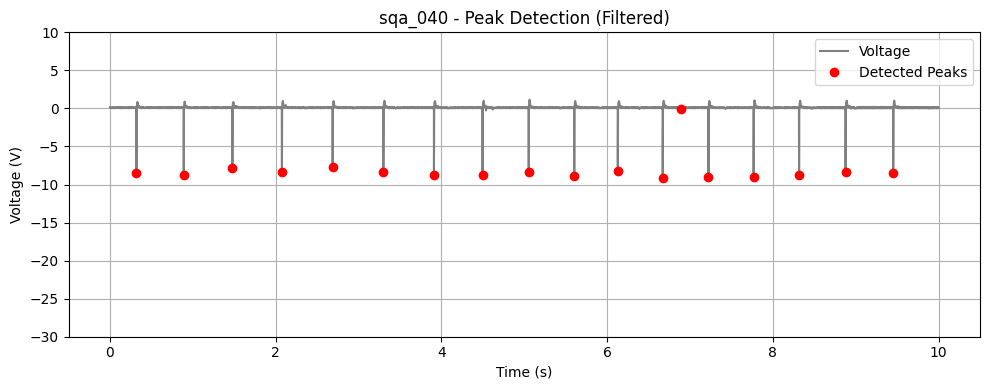

sqa_050_Vpp: 9.32 V
sqa_050_Peak number: 16개
sqa_050_표준편차: 0.52
sqa_050_주파수: 1.75 Hz


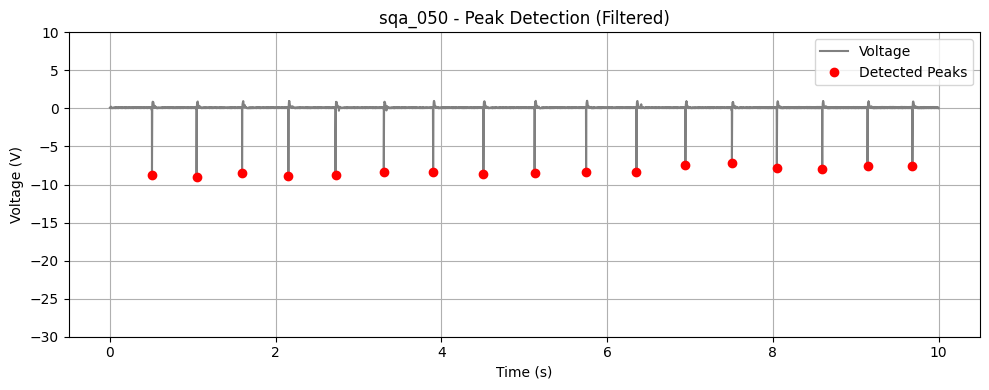

sqa_060_Vpp: 7.70 V
sqa_060_Peak number: 16개
sqa_060_표준편차: 0.26
sqa_060_주파수: 1.68 Hz


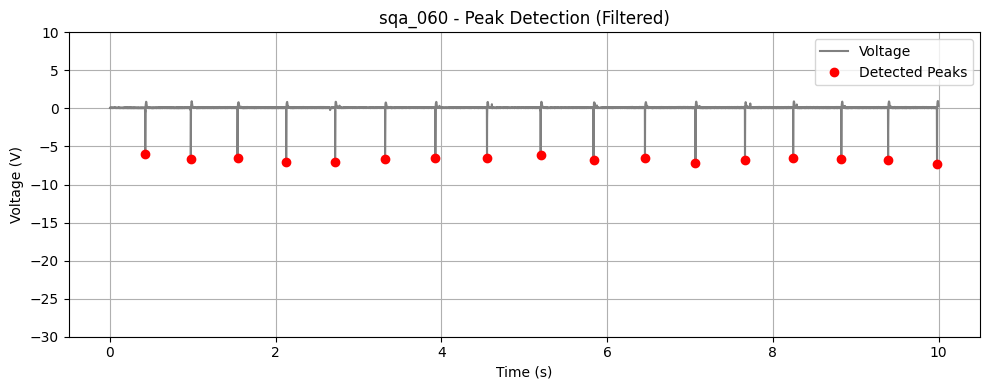

sqa_100_Vpp: 8.20 V
sqa_100_Peak number: 16개
sqa_100_표준편차: 0.31
sqa_100_주파수: 1.69 Hz


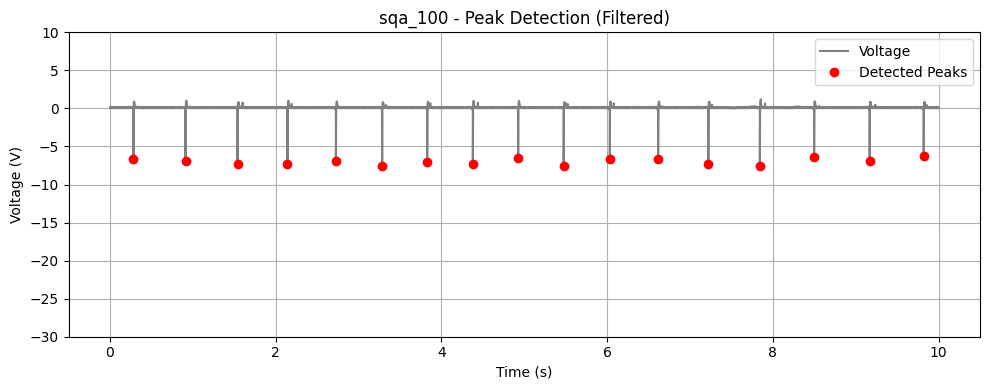

sqa_150_Vpp: 7.41 V
sqa_150_Peak number: 16개
sqa_150_표준편차: 0.30
sqa_150_주파수: 1.71 Hz


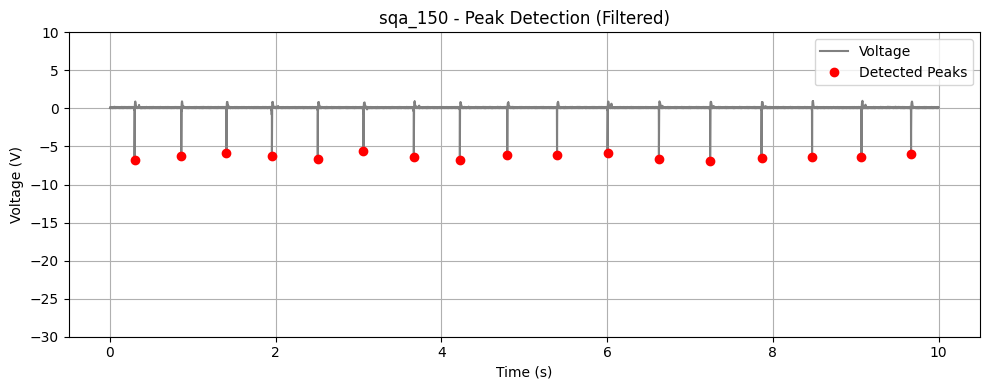


📊 모든 파일의 평균 Vpp, 표준편차, 평균 주파수 목록
hex_020.csv_Vpp: 4.56 V | 표준편차: 1.86 V | 주파수: 3.70 Hz
hex_030.csv_Vpp: 5.32 V | 표준편차: 0.24 V | 주파수: 1.79 Hz
hex_040.csv_Vpp: 5.41 V | 표준편차: 0.12 V | 주파수: 1.76 Hz
hex_050.csv_Vpp: 5.37 V | 표준편차: 0.16 V | 주파수: 1.75 Hz
hex_100.csv_Vpp: 6.32 V | 표준편차: 0.27 V | 주파수: 2.55 Hz
hex_150.csv_Vpp: 5.96 V | 표준편차: 0.24 V | 주파수: 1.99 Hz
pao_000.csv_Vpp: 0.21 V | 표준편차: 0.05 V | 주파수: 5.43 Hz
pao_010.csv_Vpp: 0.49 V | 표준편차: 0.24 V | 주파수: 2.96 Hz
pao_020.csv_Vpp: 0.67 V | 표준편차: 0.03 V | 주파수: 0.85 Hz
pao_050.csv_Vpp: 0.37 V | 표준편차: 0.06 V | 주파수: 1.67 Hz
pao_100.csv_Vpp: 1.17 V | 표준편차: 0.24 V | 주파수: 2.50 Hz
pao_150.csv_Vpp: 1.08 V | 표준편차: 0.32 V | 주파수: 3.29 Hz
ref_hex1_A.csv_Vpp: 14.80 V | 표준편차: 3.16 V | 주파수: 1.97 Hz
ref_hex2_A.csv_Vpp: 21.41 V | 표준편차: 3.13 V | 주파수: 1.70 Hz
ref_hex3_A.csv_Vpp: 19.81 V | 표준편차: 2.63 V | 주파수: 1.71 Hz
ref_ots1_A.csv_Vpp: 9.75 V | 표준편차: 1.21 V | 주파수: 1.70 Hz
ref_ots2_A.csv_Vpp: 14.70 V | 표준편차: 2.69 V | 주파수: 1.68 Hz
ref_pdms_A.csv_Vpp: 4.55 V | 

In [8]:
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
all_vpp_values = []
file_std_values = []
all_freq_values = []  ### 추가: 주파수 리스트 저장

# -------------------------------
# 파일별 처리
for file_name in csv_files:
    file_path = os.path.join(folder_path, file_name)
    try:
        # 데이터 로드
        df = pd.read_csv(file_path)
        time = df.iloc[:, 0].values
        voltage = df.iloc[:, 1].values

        # 샘플링 속도
        total_time = time[-1] - time[0]
        sampling_rate = len(time) / total_time
        distance = int(sampling_rate * min_distance_sec)

        # 피크 검출 (음의 피크 대상으로)
        prom = max(np.std(voltage) * prominence_ratio, min_prominence)
        raw_peaks, properties = find_peaks(-voltage, prominence=prom, distance=distance)

        # 피크 필터링
        max_amplitude = np.max(-voltage)
        final_peaks = []
        for i in raw_peaks:
            left = max(0, i - int(0.05 * sampling_rate))
            right = min(len(voltage), i + int(0.05 * sampling_rate))
            local_noise = max(np.std(voltage[left:right]), 1e-6)
            signal = -voltage[i]
            if signal > max_amplitude * min_relative_height and signal / local_noise > snr_threshold:
                final_peaks.append(i)

        final_peaks = np.array(final_peaks, dtype=int)
        peak_times = time[final_peaks]

        # Vpp 계산
        vpp_list = []
        for i in range(len(final_peaks) - 1):
            start = final_peaks[i]
            end = final_peaks[i + 1]
            vpp = np.max(voltage[start:end + 1]) - np.min(voltage[start:end + 1])
            vpp_list.append(vpp)

        mean_vpp = np.mean(vpp_list) if vpp_list else 0
        std = np.std(vpp_list, ddof=1) if vpp_list else 0

        # 주파수 계산
        if len(peak_times) < 2:
            mean_freq = 0
        else:
            periods = np.diff(peak_times)
            mean_freq = np.mean(1 / periods)

        # 결과 출력
        base_name = os.path.splitext(file_name)[0]
        print(f"{base_name}_Vpp: {mean_vpp:.2f} V")
        print(f"{base_name}_Peak number: {len(vpp_list):.0f}개")
        print(f"{base_name}_표준편차: {std:.2f}")
        print(f"{base_name}_주파수: {mean_freq:.2f} Hz")

        # 결과 저장
        all_vpp_values.append(mean_vpp)
        file_std_values.append(std)
        all_freq_values.append(mean_freq)  ### 추가: 각 파일 평균 주파수 저장

        # -------------------------------
        # 그래프 출력
        plt.figure(figsize=(10, 4))
        plt.plot(time, voltage, color='gray', label='Voltage')
        if len(final_peaks) > 0:
            plt.plot(time[final_peaks], voltage[final_peaks], 'ro', label='Detected Peaks')
        plt.title(f"{base_name} - Peak Detection (Filtered)")
        plt.xlabel("Time (s)")
        plt.ylabel("Voltage (V)")
        plt.ylim(y_range)
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"{file_name} 처리 중 오류 발생: {e}")

# -------------------------------
# 전체 요약 출력
print("\n==============================")
print("📊 모든 파일의 평균 Vpp, 표준편차, 평균 주파수 목록")
for i in range(len(all_vpp_values)):
    print(f"{csv_files[i]}_Vpp: {all_vpp_values[i]:.2f} V | 표준편차: {file_std_values[i]:.2f} V | 주파수: {all_freq_values[i]:.2f} Hz")

if all_vpp_values:
    overall_mean_vpp = np.mean(all_vpp_values)
    overall_std_vpp = np.std(all_vpp_values, ddof=1)
    overall_mean_freq = np.mean(all_freq_values) if all_freq_values else 0
    overall_std_freq = np.std(all_freq_values, ddof=1) if all_freq_values else 0

    print("\n==============================")
    print(f"📈 전체 평균 Vpp: {overall_mean_vpp:.2f} V")
    print(f"📉 표준편차 (Vpp): {overall_std_vpp:.2f} V")
    print(f"🎵 전체 평균 주파수: {overall_mean_freq:.2f} Hz")
    print(f"🎯 표준편차 (주파수): {overall_std_freq:.2f} Hz")
else:
    print("📭 Vpp 데이터를 계산할 수 없습니다.")